# Sentiment Analysis on Reddit Comments

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Load the data from the file
df = pd.read_csv('unique_comments.csv')

# Display the first few rows of the dataframe
df.head()

,post_id,comment_id,author,created,body,score,sentiment,negative,neutral,positive
0,1fsbl57,lpjal28,Strategist9101,1727636895,Even the Ubisoft launcher can't believe you'd ...,14305,"{'negative': 0.7241329, 'neutral': 0.24075048,...",0.724133,0.240750,0.035117
1,1fsbl57,lpjbqxy,Every-Slice59,1727637261,Back when I bought FarCry3 Uplay didn't want ...,9959,"{'positive': 0.5294238, 'neutral': 0.3814996, ...",0.089077,0.381500,0.529424
2,8pvcna,e0ec173,Skinnder,1528574909,Are you also planning on doing the same for Be...,9155,"{'neutral': 0.70636374, 'negative': 0.17327476...",0.173275,0.706364,0.120362
3,8pvcna,e0ec6tb,Loffeno,1528575075,I want to try and do this for all the conferen...,9025,"{'positive': 0.6841387, 'neutral': 0.30008593,...",0.015775,0.300086,0.684139
4,8pvcna,e0edvba,OmegamattReally,1528576859,>New Command & Conquer title\n\n\*starts hyper...,6965,"{'negative': 0.9207885, 'neutral': 0.07283612,...",0.920789,0.072836,0.006375


In [161]:
# Convert the UNIX timestamp to datetime format
df['created_date'] = pd.to_datetime(df['created'], unit='s')

# Display the first few rows to verify the changes
df[['created', 'created_date']].head()

,created,created_date
0,1727636895,2024-09-29 19:08:15
1,1727637261,2024-09-29 19:14:21
2,1528574909,2018-06-09 20:08:29
3,1528575075,2018-06-09 20:11:15
4,1528576859,2018-06-09 20:40:59


In [162]:
# Determine the sentiment category based on the highest score among negative, positive, and neutral
df['sentiment_category'] = df[['negative', 'positive', 'neutral']].idxmax(axis=1)

# Display the first few rows with the new sentiment_category column
df.head()

,post_id,comment_id,author,created,body,score,sentiment,negative,neutral,positive,created_date,sentiment_category
0,1fsbl57,lpjal28,Strategist9101,1727636895,Even the Ubisoft launcher can't believe you'd ...,14305,"{'negative': 0.7241329, 'neutral': 0.24075048,...",0.724133,0.240750,0.035117,2024-09-29 19:08:15,negative
1,1fsbl57,lpjbqxy,Every-Slice59,1727637261,Back when I bought FarCry3 Uplay didn't want ...,9959,"{'positive': 0.5294238, 'neutral': 0.3814996, ...",0.089077,0.381500,0.529424,2024-09-29 19:14:21,positive
2,8pvcna,e0ec173,Skinnder,1528574909,Are you also planning on doing the same for Be...,9155,"{'neutral': 0.70636374, 'negative': 0.17327476...",0.173275,0.706364,0.120362,2018-06-09 20:08:29,neutral
3,8pvcna,e0ec6tb,Loffeno,1528575075,I want to try and do this for all the conferen...,9025,"{'positive': 0.6841387, 'neutral': 0.30008593,...",0.015775,0.300086,0.684139,2018-06-09 20:11:15,positive
4,8pvcna,e0edvba,OmegamattReally,1528576859,>New Command & Conquer title\n\n\*starts hyper...,6965,"{'negative': 0.9207885, 'neutral': 0.07283612,...",0.920789,0.072836,0.006375,2018-06-09 20:40:59,negative


In [163]:
df.to_csv('formatted_unique_comments.csv', index=False)

C:\Users\school\AppData\Local\Temp\ipykernel_18916\3040487305.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




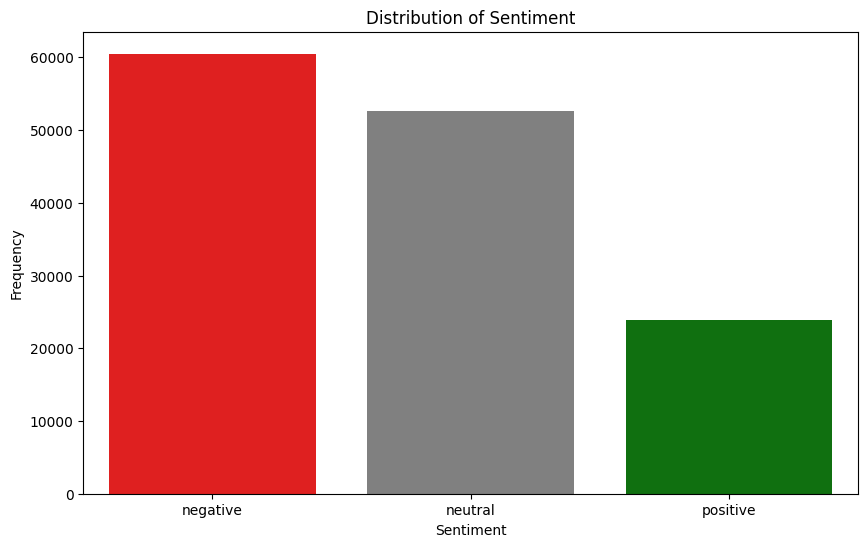

In [151]:
# Plot the distribution of sentiment categories
plt.figure(figsize=(10, 6))
palette = {'negative': 'red', 'neutral': 'grey', 'positive': 'green'}
sns.countplot(x='sentiment_category', data=df, order=['negative', 'neutral', 'positive'], palette=palette)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [152]:
# Set the created_date as the index
df.set_index('created_date', inplace=True)

# Resample the data by month and count the occurrences of each sentiment category
monthly_sentiment = df.resample('M').sentiment_category.value_counts().unstack().fillna(0)

C:\Users\school\AppData\Local\Temp\ipykernel_18916\2185867267.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



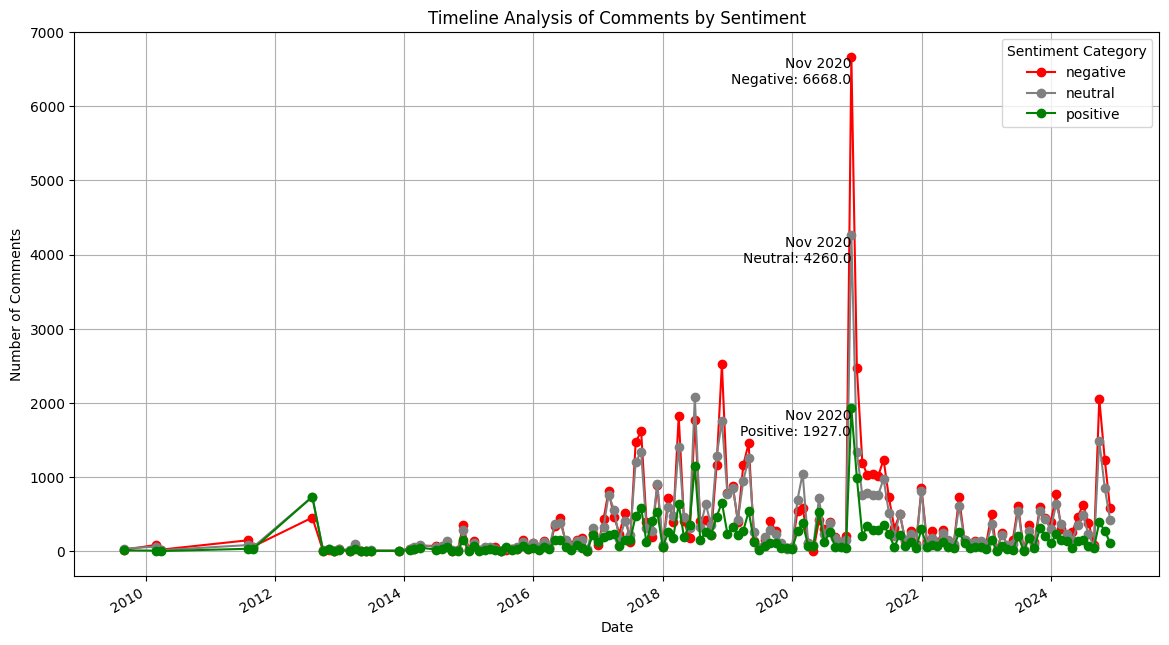

In [153]:
# Plot the timeline analysis
plt.figure(figsize=(14, 8))
monthly_sentiment.plot(kind='line', marker='o', ax=plt.gca(), color=['red', 'grey', 'green'])
plt.title('Timeline Analysis of Comments by Sentiment')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.legend(title='Sentiment Category')
plt.grid(True)

# Annotate the month with the highest count of comments for each sentiment category
for sentiment in monthly_sentiment.columns:
    max_value = monthly_sentiment[sentiment].max()
    max_date = monthly_sentiment[monthly_sentiment[sentiment] == max_value].index[0]
    annotated_date = dt.datetime.strftime(max_date, '%b %Y')
    plt.annotate(
        f'{annotated_date}\n{sentiment.capitalize()}: {max_value}',
        xy=(max_date, max_value),
        xytext=(max_date, max_value),
        horizontalalignment='right',
        verticalalignment='top'
    )

plt.show()

## Check the general sentiment of each post based on the comments

In [154]:
# Group by post_id and calculate the mean sentiment scores and total score for each post
post_sentiments = df.groupby('post_id').agg({
    'comment_id': 'count',
    'negative': 'mean',
    'neutral': 'mean',
    'positive': 'mean',
    'score': 'sum'
}).reset_index()

# Rename the columns for clarity
post_sentiments.rename(columns={'comment_id': 'comment_count'}, inplace=True)

# Determine the general sentiment category for each post
post_sentiments['general_sentiment'] = post_sentiments[['negative', 'neutral', 'positive']].idxmax(axis=1)

# Sort the posts based on the total score in descending order
post_sentiments.sort_values(by='comment_count', ascending=False, inplace=True)

# Display the posts with their general sentiment
post_sentiments.head(30)

,post_id,comment_count,negative,neutral,positive,score,general_sentiment
812,jr6gvi,4295,0.399837,0.382143,0.215227,18320,negative
393,6pmx25,2022,0.463944,0.378504,0.153596,24728,negative
809,jqzgf3,1820,0.531692,0.348137,0.117973,2996,negative
199,1fsbl57,1790,0.498014,0.350348,0.151639,56199,negative
526,8pvcna,1769,0.375340,0.364294,0.260366,55440,negative
829,k1z98h,1692,0.600144,0.305728,0.089400,4162,negative
668,b3g0ne,1633,0.435065,0.392589,0.168671,22287,negative
826,jwmzbk,1581,0.600870,0.314119,0.080583,3372,negative
406,6va1rq,1400,0.468765,0.360335,0.168757,16920,negative
678,be88c0,1399,0.350070,0.394630,0.253871,17750,neutral


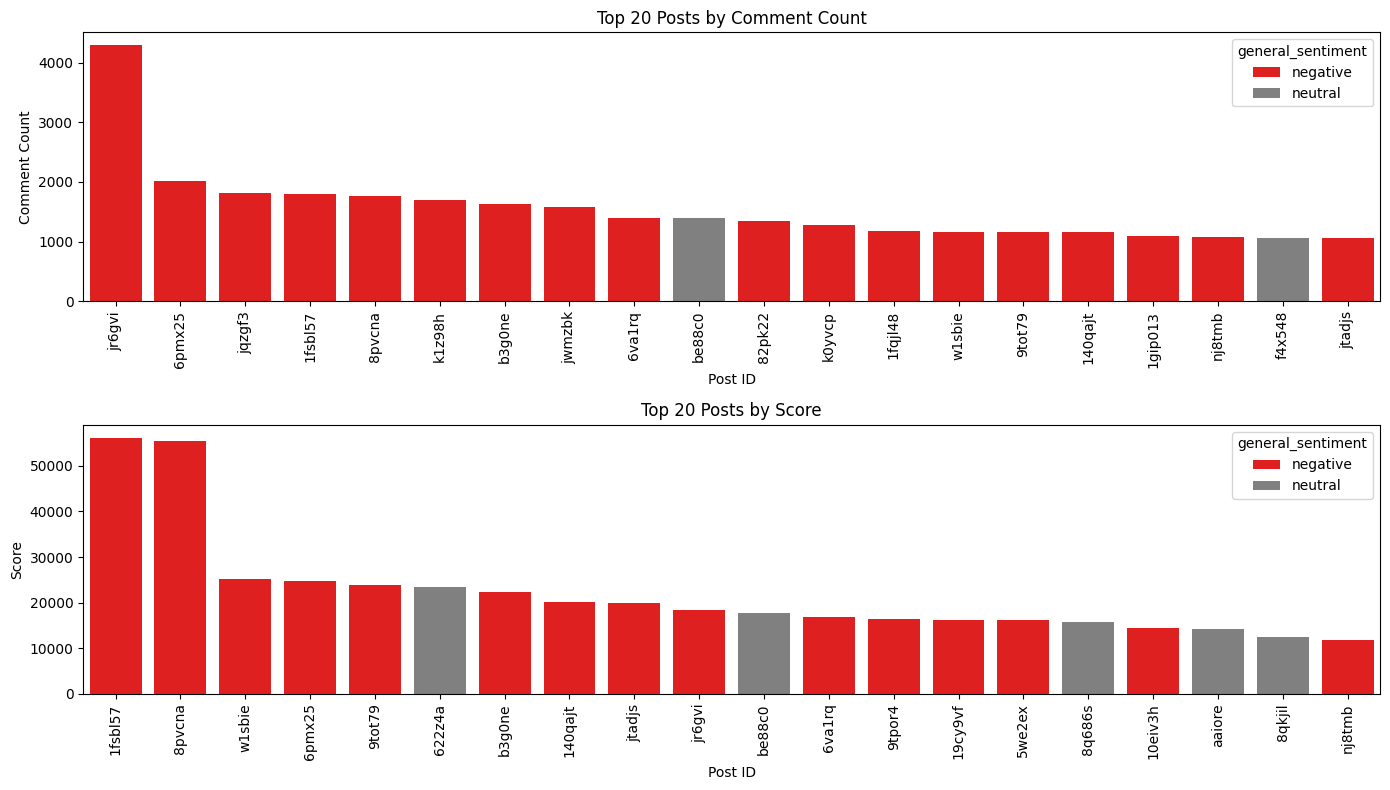

In [155]:
# Select the top 20 posts
top_20_posts_comment = post_sentiments.head(20)
top_20_posts_score = post_sentiments.sort_values(by='score', ascending=False).head(20)

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Define a color palette for the general sentiment categories
palette = {'positive': 'green', 'negative': 'red', 'neutral': 'gray'}

# Plot the comment count
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x='post_id', y='comment_count', hue='general_sentiment', data=top_20_posts_comment, dodge=False, palette=palette)
plt.title('Top 20 Posts by Comment Count')
plt.xlabel('Post ID')
plt.ylabel('Comment Count')
plt.xticks(rotation=90)

# Plot the score
plt.subplot(2, 1, 2)
sns.barplot(x='post_id', y='score', hue='general_sentiment', data=top_20_posts_score, dodge=False, palette=palette)
plt.title('Top 20 Posts by Score')
plt.xlabel('Post ID')
plt.ylabel('Score')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Check the general sentiment for each user

In [156]:
# Aggregate the rows based on the author
author_aggregation = df.groupby('author').agg({
    'comment_id': 'count',
    'score': 'sum',
    'negative': 'mean',
    'neutral': 'mean',
    'positive': 'mean'
}).reset_index()

# Rename the columns for clarity
author_aggregation.rename(columns={'comment_id': 'comment_count'}, inplace=True)

# Determine the general sentiment category for each author
author_aggregation['general_sentiment'] = author_aggregation[['negative', 'neutral', 'positive']].idxmax(axis=1)

author_aggregation.sort_values(by='comment_count', ascending=False, inplace=True)

# Display the aggregated data
author_aggregation.head(30)

,author,comment_count,score,negative,neutral,positive,general_sentiment
39980,bigbadboy333,228,2181,0.179996,0.389153,0.430852,positive
19445,LordKeren,215,1405,0.264604,0.482808,0.252589,neutral
19478,Lord_Antheron,207,1265,0.489252,0.335159,0.141773,negative
46838,jeypiti,189,1044,0.225836,0.533847,0.229735,neutral
18747,LeanFoo,170,1029,0.038721,0.210872,0.750407,positive
50686,nstav13,158,1561,0.256640,0.514211,0.197503,neutral
5903,ChankaNewsNetwork,158,846,0.190687,0.451557,0.357756,neutral
6927,CoupeontheBeat,155,3885,0.432549,0.337337,0.230115,negative
15716,ItsAmerico,151,963,0.431962,0.435881,0.132157,neutral
23032,Nightsong,142,953,0.419130,0.415384,0.165486,negative


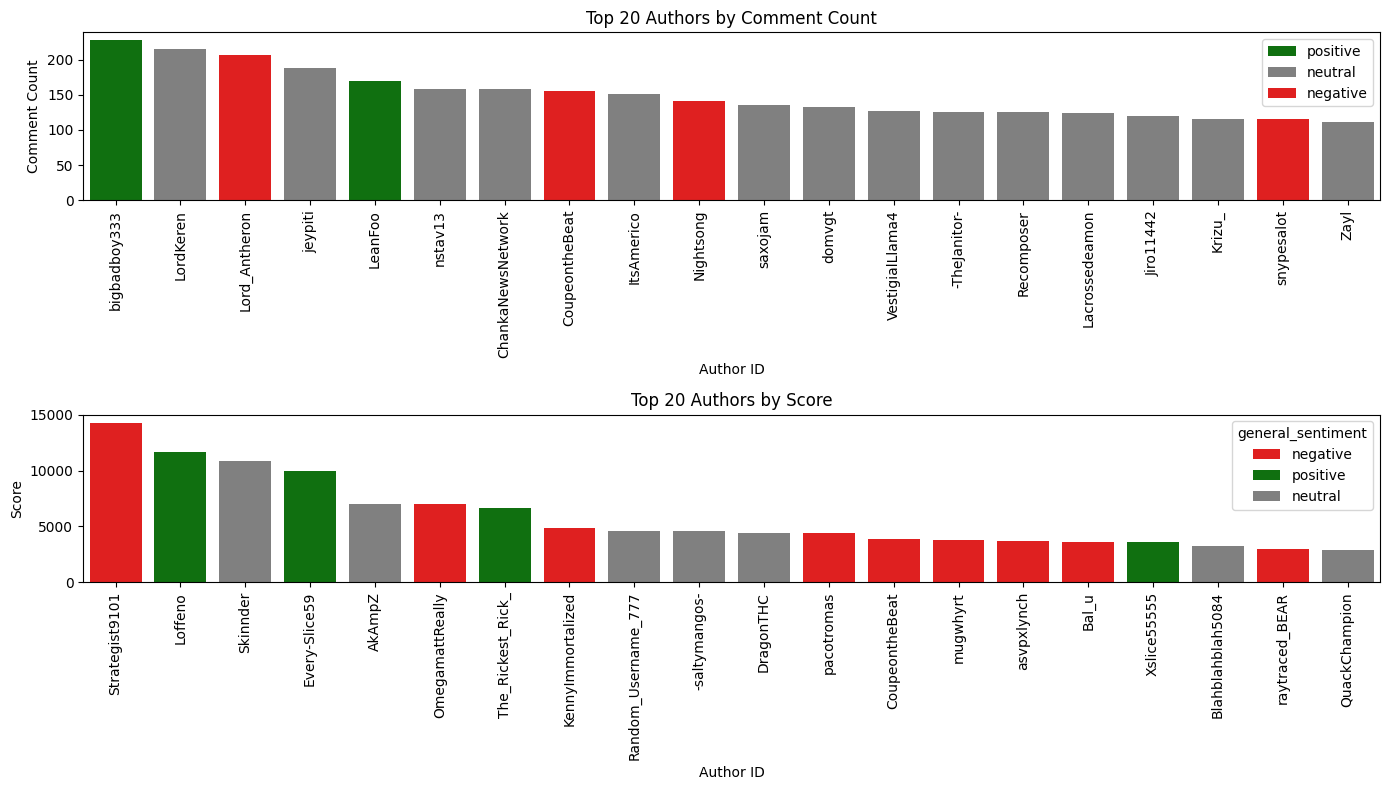

In [157]:
# Select the top 20 authors
top_20_author_comment = author_aggregation.head(20)
top_20_author_score = author_aggregation.sort_values(by='score', ascending=False).head(20)

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Define a color palette for the general sentiment categories
palette = {'positive': 'green', 'negative': 'red', 'neutral': 'gray'}

# Plot the comment count
plt.subplot(2, 1, 1)
sns.barplot(x='author', y='comment_count', hue='general_sentiment', data=top_20_author_comment, dodge=False, palette=palette)
plt.title('Top 20 Authors by Comment Count')
plt.xlabel('Author ID')
plt.ylabel('Comment Count')
plt.xticks(rotation=90)
legend = plt.legend(bbox_to_anchor=(1, 1), loc='upper right')  # Move legend to the side

# Plot the score
plt.subplot(2, 1, 2)
sns.barplot(x='author', y='score', hue='general_sentiment', data=top_20_author_score, dodge=False, palette=palette)
plt.title('Top 20 Authors by Score')
plt.xlabel('Author ID')
plt.ylabel('Score')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()